In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import datetime as dt

In [2]:
!pip install gdown

In [3]:
#msft
!gdown 'https://drive.google.com/uc?export=download&id=1HV5A7Wbqrfu9fxx4KlAZRrwe7iu51l0K'
#tatmotors
!gdown 'https://drive.google.com/uc?export=download&id=14Kdf2CZwt-TmS9FD35ChiwqiFm9QUowu'
#tcs
!gdown 'https://drive.google.com/uc?export=download&id=1bh7mHFAUwoW_CIl6RkNdTa74M_ONXXLd'
#reliance
!gdown 'https://drive.google.com/uc?export=download&id=1xV-6oHcueuYpp8s6h3iX37KyJ9TDCQMj'
#nifty bank
!gdown 'https://drive.google.com/uc?export=download&id=11MJOzb4QLGhstJb2CDsmw6C8ECBsi8Zd'
#nifty50
!gdown 'https://drive.google.com/uc?export=download&id=11f8_KeYOksOF1DGIHjEBlrBWmU3GdJkk'
#godrejindia
!gdown 'https://drive.google.com/uc?export=download&id=1c7dk0PI90KPsXLhMYSUTAeyKFVq8sbe-'
#bnbusdt
!gdown 'https://drive.google.com/uc?export=download&id=1gldfddA6O99ReLtfF8bZ0grHY9wQ1t79'
#btcusdt
!gdown 'https://drive.google.com/uc?export=download&id=1Xb4CpsjSrpA5KXYpQi4Jppn15N5JgbcL'
#dogeusdt
!gdown 'https://drive.google.com/uc?export=download&id=1pN1p3JXCeBeRF4Cdfl4TbIOt86MKJInS'
#ehusdt
!gdown 'https://drive.google.com/uc?export=download&id=1wRiIhbu5UPA9tyI9Bie_d3s_7hLJO5th'
#solusdt
!gdown 'https://drive.google.com/uc?export=download&id=1sTK5z_uiB8FYbdpVQjI0nmCn69xATOrm'
#audusd
!gdown 'https://drive.google.com/uc?export=download&id=1Zn_-DYiXB8oN1Hzilo7NrWUzhhV1F4vu'
#eurusd
!gdown 'https://drive.google.com/uc?export=download&id=1cfUt_l4dSzm9T-U1uupVtRSyrncpdqlY'
#gbpusd
!gdown 'https://drive.google.com/uc?export=download&id=1qreCd-9VpVPmHymw3YiCxxQnPS6zP0w2'
#usdcad
!gdown 'https://drive.google.com/uc?export=download&id=1J1WvB8Y8kJesPE__6LlJuZUF1rFBReEJ'
#usdjpy
!gdown 'https://drive.google.com/uc?export=download&id=1jpfIHtC0Kuv00kU8DLmLPxf5YYzNQnla'
#aapl
!gdown 'https://drive.google.com/uc?export=download&id=17Rv4g5pUbdlfU-Zsu7PGtGAxfTLjRYm9'
#amzn
!gdown 'https://drive.google.com/uc?export=download&id=1WmZPKRIu5IPwyov6DSh11WD2yLR1TbQ3'
#dow
!gdown 'https://drive.google.com/uc?export=download&id=1L_sKTIxpVk89PAqFU0RF0d2roTjZhtxz'
#gs
!gdown 'https://drive.google.com/uc?export=download&id=1Ig_TkrXuEFu_az78h-QIgjjjF9PYejZv'
#meta
!gdown 'https://drive.google.com/uc?export=download&id=1K7T7D4pnz9189rRJhRj_OTvGaUS9kmfx'



Downloading...
From: https://drive.google.com/uc?export=download&id=1HV5A7Wbqrfu9fxx4KlAZRrwe7iu51l0K
To: /content/MSFT_1d.csv
100% 214k/214k [00:00<00:00, 62.2MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=14Kdf2CZwt-TmS9FD35ChiwqiFm9QUowu
To: /content/TATAMOTORS_1d.csv
100% 222k/222k [00:00<00:00, 18.5MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1bh7mHFAUwoW_CIl6RkNdTa74M_ONXXLd
To: /content/TCS_1d.csv
100% 232k/232k [00:00<00:00, 32.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1xV-6oHcueuYpp8s6h3iX37KyJ9TDCQMj
To: /content/RELIANCE_1d.csv
100% 227k/227k [00:00<00:00, 76.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=11MJOzb4QLGhstJb2CDsmw6C8ECBsi8Zd
To: /content/NIFTY BANK_1d.csv
100% 226k/226k [00:00<00:00, 75.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=11f8_KeYOksOF1DGIHjEBlrBWmU3GdJkk
To: /content/NIFTY 50_1d.csv
100% 220k/220k [00:00<00

In [4]:
ETHUSDT = pd.read_csv('ETHUSDT_1d.csv', parse_dates=True, index_col='timestamp')
EURUSD = pd.read_csv('EURUSD_1d.csv', parse_dates=True, index_col='DateTime')
TCS = pd.read_csv('TCS_1d.csv', parse_dates=True, index_col='date')
NIFTY50 = pd.read_csv('NIFTY 50_1d.csv', parse_dates=True, index_col='date')
AMZN = pd.read_csv('AMZN_1d.csv', parse_dates=True, index_col='timestamp')
AAPL= pd.read_csv('AAPL_1d.csv', parse_dates=True, index_col='timestamp')
AUDUSD=pd.read_csv('AUDUSD_1d.csv', parse_dates=True, index_col='DateTime')
BNBUSDT=pd.read_csv('BNBUSDT_1d.csv', parse_dates=True, index_col='timestamp')
DOGEUSDT=pd.read_csv('DOGEUSDT_1d.csv', parse_dates=True, index_col='timestamp')
BTCUSDT=pd.read_csv('BTCUSDT_1d.csv', parse_dates=True, index_col='timestamp')
SOLUSDT=pd.read_csv('SOLUSDT_1d.csv', parse_dates=True, index_col='timestamp')
DOW=pd.read_csv('DOW_1d.csv', parse_dates=True, index_col='timestamp')
GBPUSD=pd.read_csv('GBPUSD_1d.csv', parse_dates=True, index_col='DateTime')
GS=pd.read_csv('GS_1d.csv', parse_dates=True, index_col='timestamp')
META=pd.read_csv('META_1d.csv', parse_dates=True, index_col='timestamp')
GODREJIND=pd.read_csv('GODREJIND_1d.csv', parse_dates=True, index_col='date')
MSFT=pd.read_csv('MSFT_1d.csv', parse_dates=True, index_col='timestamp')
RELIANCE=pd.read_csv('RELIANCE_1d.csv', parse_dates=True, index_col='date')
NIFTYBANK=pd.read_csv('NIFTY BANK_1d.csv', parse_dates=True, index_col='date')
TATAMOTORS=pd.read_csv('TATAMOTORS_1d.csv', parse_dates=True, index_col='date')
USDCAD=pd.read_csv('USDCAD_1d.csv', parse_dates=True, index_col='DateTime')
USDJPY=pd.read_csv('USDJPY_1d.csv', parse_dates=True, index_col='DateTime')

<ipython-input-4-eefb1c329231>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  GS=pd.read_csv('GS_1d.csv', parse_dates=True, index_col='timestamp')
<ipython-input-4-eefb1c329231>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  META=pd.read_csv('META_1d.csv', parse_dates=True, index_col='timestamp')


In [5]:
datasets = {'ETHUSDT': ETHUSDT, 'EURUSD': EURUSD, 'TCS': TCS, 'NIFTY50': NIFTY50, 'AMZN': AMZN, 'AAPL': AAPL,
            'AUDUSD': AUDUSD, 'BNBUSDT': BNBUSDT, 'DOGEUSDT': DOGEUSDT, 'BTCUSDT': BTCUSDT, 'SOLUSDT': SOLUSDT,
            'DOW': DOW, 'GBPUSD': GBPUSD, 'GS': GS, 'META': META, 'GODREJIND': GODREJIND, 'MSFT': MSFT,
            'RELIANCE': RELIANCE, 'NIFTYBANK': NIFTYBANK, 'TATAMOTORS': TATAMOTORS, 'USDCAD': USDCAD, 'USDJPY': USDJPY}

for name, df in datasets.items():
    df.index.name = 'DateTime'

In [6]:
TCS['DateTime'] = TCS.index.date
GODREJIND['DateTime'] = GODREJIND.index.date
NIFTY50['DateTime'] = NIFTY50.index.date
NIFTYBANK['DateTime'] = NIFTYBANK.index.date
RELIANCE['DateTime'] = RELIANCE.index.date
TATAMOTORS['DateTime'] = TATAMOTORS.index.date

AAPL['DateTime'] = AAPL.index.date
AMZN['DateTime'] = AMZN.index.date
DOW['DateTime'] = DOW.index.date
MSFT['DateTime'] = MSFT.index.date

AUDUSD['DateTime'] = AUDUSD.index.date
EURUSD['DateTime'] = EURUSD.index.date
GBPUSD['DateTime'] = GBPUSD.index.date
USDCAD['DateTime'] = USDCAD.index.date
USDJPY['DateTime'] = USDJPY.index.date


GS['DateTime'] = pd.to_datetime(GS.index, unit='ms')
META['DateTime'] = pd.to_datetime(META.index, unit='ms')
GS['DateTime'] = GS['DateTime'].dt.date
META['DateTime'] = META['DateTime'].dt.date

In [7]:
for df in [GS, META, ETHUSDT, EURUSD, TCS, NIFTY50, NIFTYBANK, RELIANCE, TATAMOTORS, AAPL, AMZN, AUDUSD, BNBUSDT, DOGEUSDT, BTCUSDT, SOLUSDT, DOW, GBPUSD, USDCAD, USDJPY]:
    df.columns = df.columns.str.lower().str.strip()

In [8]:
def clean_data(df):
    df.index = pd.to_datetime(df.index)
    df.index = df.index.tz_localize(None)
    df = df[~df.index.duplicated(keep='first')]
    return df

# Clean all datasets
GS = clean_data(GS)
META = clean_data(META)
ETHUSDT = clean_data(ETHUSDT)
EURUSD = clean_data(EURUSD)
TCS = clean_data(TCS)
NIFTY50 = clean_data(NIFTY50)
NIFTYBANK = clean_data(NIFTYBANK)
RELIANCE = clean_data(RELIANCE)
TATAMOTORS = clean_data(TATAMOTORS)
AAPL = clean_data(AAPL)
AMZN = clean_data(AMZN)
AUDUSD = clean_data(AUDUSD)
BNBUSDT = clean_data(BNBUSDT)
DOGEUSDT = clean_data(DOGEUSDT)
BTCUSDT = clean_data(BTCUSDT)
SOLUSDT = clean_data(SOLUSDT)
DOW = clean_data(DOW)
GBPUSD = clean_data(GBPUSD)
USDCAD = clean_data(USDCAD)
USDJPY = clean_data(USDJPY)

***ASSET RETURN***
Sharpe Ratio: -13.0523
Max Drawdown: 0.7395
Cumulative Return: 0.3308
***END***
***ASSET RETURN***
Sharpe Ratio: 0.3365
Max Drawdown: 11.7375
Cumulative Return: 14.3973
***END***
***ASSET RETURN***
Sharpe Ratio: -5.6116
Max Drawdown: 1.4779
Cumulative Return: 0.0399
***END***
***ASSET RETURN***
Sharpe Ratio: -35.1930
Max Drawdown: 0.2170
Cumulative Return: 1.0731
***END***
***ASSET RETURN***
Sharpe Ratio: -16.4054
Max Drawdown: 0.6977
Cumulative Return: 2.1997
***END***


<ipython-input-9-e27a9b3acbe1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'SMA'] = df['close'].rolling(window).mean()
<ipython-input-9-e27a9b3acbe1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'StdDev'] = df['close'].rolling(window).std()
<ipython-input-9-e27a9b3acbe1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

***ASSET RETURN***
Sharpe Ratio: -21.1682
Max Drawdown: 0.5211
Cumulative Return: 0.8398
***END***
***ASSET RETURN***
Sharpe Ratio: -15.8056
Max Drawdown: 0.6019
Cumulative Return: 0.7383
***END***
***ASSET RETURN***
Sharpe Ratio: -13.6663
Max Drawdown: 0.7535
Cumulative Return: 1.1678
***END***
***ASSET RETURN***
Sharpe Ratio: -10.0288
Max Drawdown: 1.2179
Cumulative Return: 0.5226
***END***
***ASSET RETURN***
Sharpe Ratio: -11.9257
Max Drawdown: 0.9796
Cumulative Return: 0.0501
***END***
***ASSET RETURN***
Sharpe Ratio: -10.3411
Max Drawdown: 1.3561
Cumulative Return: 0.2803
***END***


<ipython-input-9-e27a9b3acbe1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'SMA'] = df['close'].rolling(window).mean()
<ipython-input-9-e27a9b3acbe1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'StdDev'] = df['close'].rolling(window).std()
<ipython-input-9-e27a9b3acbe1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

***ASSET RETURN***
Sharpe Ratio: -28.7185
Max Drawdown: 0.4578
Cumulative Return: 0.7531
***END***
***ASSET RETURN***
Sharpe Ratio: -4.9251
Max Drawdown: 1.1176
Cumulative Return: 0.0136
***END***
***ASSET RETURN***
Sharpe Ratio: -1.7949
Max Drawdown: 3.1680
Cumulative Return: -0.0588
***END***
***ASSET RETURN***
Sharpe Ratio: -6.8934
Max Drawdown: 1.0364
Cumulative Return: 0.0830
***END***
***ASSET RETURN***
Sharpe Ratio: -4.3471
Max Drawdown: 1.1441
Cumulative Return: 0.0172
***END***
***ASSET RETURN***
Sharpe Ratio: -11.5146
Max Drawdown: 0.9345
Cumulative Return: 2.2004
***END***
***ASSET RETURN***
Sharpe Ratio: -34.3122
Max Drawdown: 0.3108
Cumulative Return: 0.9744
***END***


<ipython-input-9-e27a9b3acbe1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'SMA'] = df['close'].rolling(window).mean()
<ipython-input-9-e27a9b3acbe1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'StdDev'] = df['close'].rolling(window).std()
<ipython-input-9-e27a9b3acbe1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

***ASSET RETURN***
Sharpe Ratio: -42.0509
Max Drawdown: 0.4456
Cumulative Return: 0.9693
***END***
***ASSET RETURN***
Sharpe Ratio: -46.5167
Max Drawdown: 0.2103
Cumulative Return: 1.0590
***END***
***ASSET RETURN***
Sharpe Ratio: -14.1080
Max Drawdown: 0.9805
Cumulative Return: 1.4433
***END***
***ASSET RETURN***
Sharpe Ratio: -13.5429
Max Drawdown: 1.0578
Cumulative Return: 1.5151
***END***


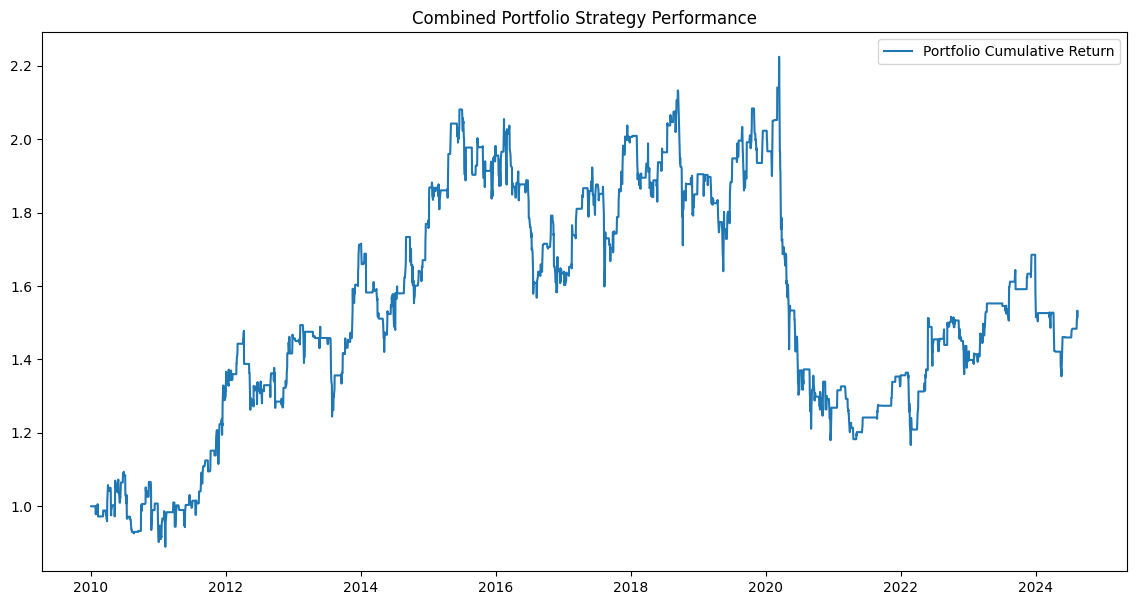

Correlation between strategies:
                 BB Buy Signal  SO Buy Signal  VWAP Buy Signal
BB Buy Signal         1.000000       0.355303              NaN
SO Buy Signal         0.355303       1.000000              NaN
VWAP Buy Signal            NaN            NaN              NaN


In [9]:

total=[]
def bollinger_bands(df, window=20, num_std=2):
    df.loc[:, 'SMA'] = df['close'].rolling(window).mean()
    df.loc[:,'StdDev'] = df['close'].rolling(window).std()
    df.loc[:, 'Upper Band'] = df['SMA'] + (num_std * df['StdDev'])
    df.loc[:, 'Lower Band'] = df['SMA'] - (num_std * df['StdDev'])
    df.loc[:, 'BB Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)

    df.loc[:,'BB Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)
    return df

def stochastic_oscillator(df, k_window=14, d_window=3, smoothing=3):
    low_min = df['low'].rolling(window=k_window).min()
    high_max = df['high'].rolling(window=k_window).max()
    percent_k_raw = 100 * (df['close'] - low_min) / (high_max - low_min)
    df.loc[:, '%K'] = percent_k_raw.rolling(window=smoothing).mean()

    df.loc[:,'%D'] = df['%K'].rolling(window=d_window).mean()
    df.loc[:,'SO Buy Signal'] = (df['%K'] < 20).astype(int)
    df.loc[:,'SO Sell Signal'] = (df['%K'] > 80).astype(int)
    return df

def vwap_strategy(df, multiplier=1):
    typical_price = (df['high'] + df['low'] + df['close']) / 3
    vwap_values = (typical_price * df['volume']).cumsum() / df['volume'].cumsum()
    atr = (df['high'] - df['low']).rolling(window=14).mean()
    threshold = atr * multiplier
    df.loc[:, 'VWAP Buy Signal'] = (df['close'] < vwap_values * (1 - threshold)).astype(int)
    df.loc[:,'VWAP Sell Signal'] = (df['close'] > vwap_values * (1 + threshold)).astype(int)
    return df

for df in [GS, META, ETHUSDT, EURUSD, TCS, NIFTY50, NIFTYBANK, RELIANCE, TATAMOTORS, AAPL, AMZN, AUDUSD, BNBUSDT, DOGEUSDT, BTCUSDT, SOLUSDT, DOW, GBPUSD, USDCAD, USDJPY , MSFT, GODREJIND]:
  df = bollinger_bands(df)
  df = stochastic_oscillator(df)
  df = vwap_strategy(df)

  df.loc[:, 'Combined Buy Signal'] = df[['BB Buy Signal', 'SO Buy Signal', 'VWAP Buy Signal']].sum(axis=1)
  df.loc[:,'Combined Sell Signal'] = df[['BB Sell Signal', 'SO Sell Signal', 'VWAP Sell Signal']].sum(axis=1)

  df.loc[:, 'Combined Buy Signal'] = np.where(df['Combined Buy Signal'] > 0, 1, 0)
  df.loc[:,'Combined Sell Signal'] = np.where(df['Combined Sell Signal'] > 0, -1, 0)

  df.loc[:, 'Position'] = df['Combined Buy Signal'] + df['Combined Sell Signal']
  df.loc[:, 'Position'] = df['Position'].replace(-2, -1)


  df.loc[:,'Position'] = df['Position'].shift()

  df.loc[:,'Daily Return'] = df['close'].pct_change() * df['Position'].shift()

  df.loc[:,'Cumulative Return'] = (1 + df['Daily Return'].fillna(0)).cumprod()

  def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
      excess_return = returns.mean() - risk_free_rate
      return excess_return / returns.std() * np.sqrt(252)

  def max_drawdown(cumulative_returns):
      roll_max = cumulative_returns.cummax()
      drawdown = roll_max - cumulative_returns
      return drawdown.max()

  sharpe_ratio = calculate_sharpe_ratio(df['Daily Return'])

  max_dd = max_drawdown(df['Cumulative Return'])

  cumulative_return = df['Cumulative Return'].iloc[-1]

  print("***ASSET RETURN***")
  print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
  print(f"Max Drawdown: {max_dd:.4f}")
  print(f"Cumulative Return: {cumulative_return:.4f}")
  print("***END***")
  total.append(cumulative_return)



plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Cumulative Return'], label='Portfolio Cumulative Return')
plt.title('Combined Portfolio Strategy Performance')
plt.legend()
plt.show()

strategies = df[['BB Buy Signal', 'SO Buy Signal', 'VWAP Buy Signal']]
correlation_matrix = strategies.corr()
print("Correlation between strategies:")
print(correlation_matrix)



In [23]:
def portfolio_return(W,R):
  return W*R

weights={
    'GS': 0.0177,
    'META': 0.30387,
    'ETHUSDT': 0.0177,

    'EURUSD': 0.0531,
    'TCS': 0.0637,
    'NIFTY50': 0.0071,
    'NIFTYBANK': 0.0177,
    'RELIANCE': 0.0354,
    'TATAMOTORS': 0.0177,
    'AAPL': 0.0354,
    'AMZN': 0.0354,
    'AUDUSD': 0.0637,
    'BNBUSDT': 0.0177,
    'DOGEUSDT': 0.0093,
    'BTCUSDT': 0.0071,
    'SOLUSDT': 0.02705,
    'DOW': 0.0708,
    'GBPUSD': 0.0354,
    'USDCAD': 0.0354,
    'USDJPY': 0.0354,
    'MSFT':0.01658,
    'GODREJIND':0.0768

}
i=0
sums=0
for key,val in weights.items():

  res=portfolio_return(val,total[i])
  sums+=res
  i+=1
print(f"portfolio return:{sums}")

portfolio return:5.110989766072319
